# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Requried Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
## Checking shape of Dataset
df.shape

(1470, 35)

We have 1470 rows and 35 column including target Attribute.

Attrition is our Target Attribute.

This is a Classification Problem statement.

In [5]:
## Checking Datatype
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We can see that in our dataset 9 attributes have Object data Type and 24 attribute have integer datatype.

All datatype of our attributes are ok.

In [6]:
## Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that out of 1470 entries of data , all columns contains the same number of filled data.

Which mean there is no null values present in our dataset.

In [7]:
## Checking Null Values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values present in our dataset

<AxesSubplot:title={'center':'Null values'}>

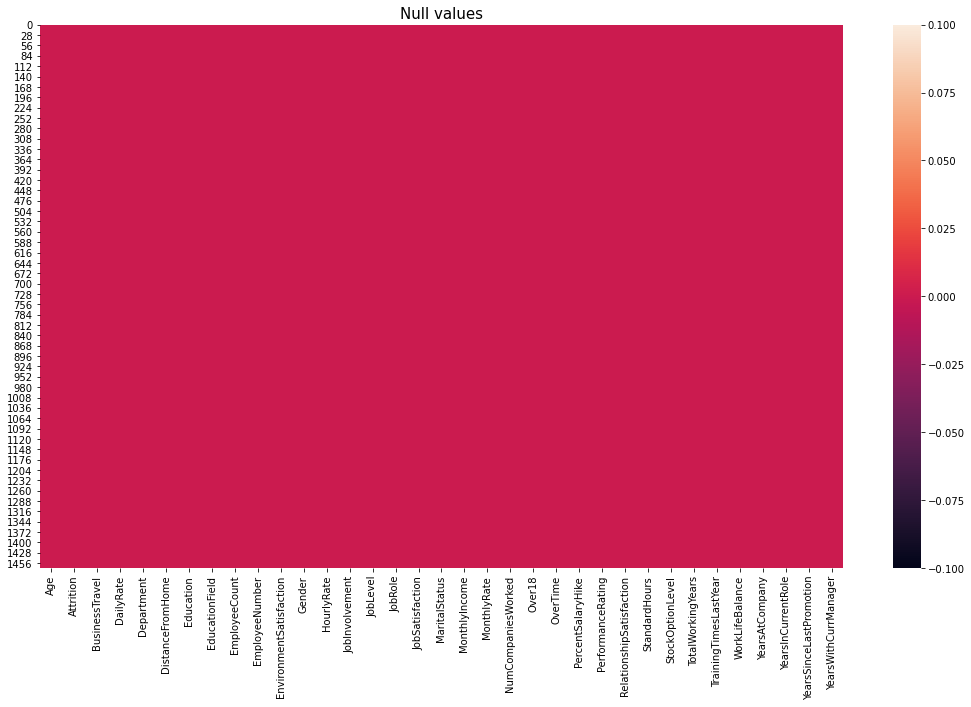

In [8]:
plt.figure(figsize=(18,10))
plt.title('Null values',fontsize=15)
sns.heatmap(df.isnull())

In [9]:
## Statistical Summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Observation: 
1-We can observe that MOnthly Income, MOnthly rate are Right skewed because Mean values is greater than the Median Values.

2- We can observe that for most of attribute the median values(50%) is near to it's mean value which shows that data is normally distributed.

3-In some columns such as StandardHours,EmployeeCount only single number is repeated, Means there is a constant values present which has no significance.

4- In columns such as StockOptionLevel,	TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole.YearsSinceLastPromotion,YearsWithCurrManager have the minimun values is Zero which shows that some new joining/Recent joining are also present in our Dataset.

In [10]:
## Checking the unique values in these columns.
print(df['EmployeeCount'].unique())
print(df['StandardHours'].unique())
print(df['Over18'].unique())

[1]
[80]
['Y']


In [11]:
## Dropping the duplicate columns
df_1=df.drop(['EmployeeCount','StandardHours','EmployeeNumber', 'Over18'],axis=1)

We have drop EmployeeCount,StandardHours and Over18 because it has only one unique values.

we have drop EmployeeCount,EmployeeNumber because it is just a counting number of employees , it has no significance for checking Attrition.

In [12]:
#Checking corelation of columns with our target variable attrition first we have to transform the target column into label
Num_val = {'Yes':1, 'No':0}
df_1['Attrition'] = df_1["Attrition"].apply(lambda x: Num_val[x])
df_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<AxesSubplot:>

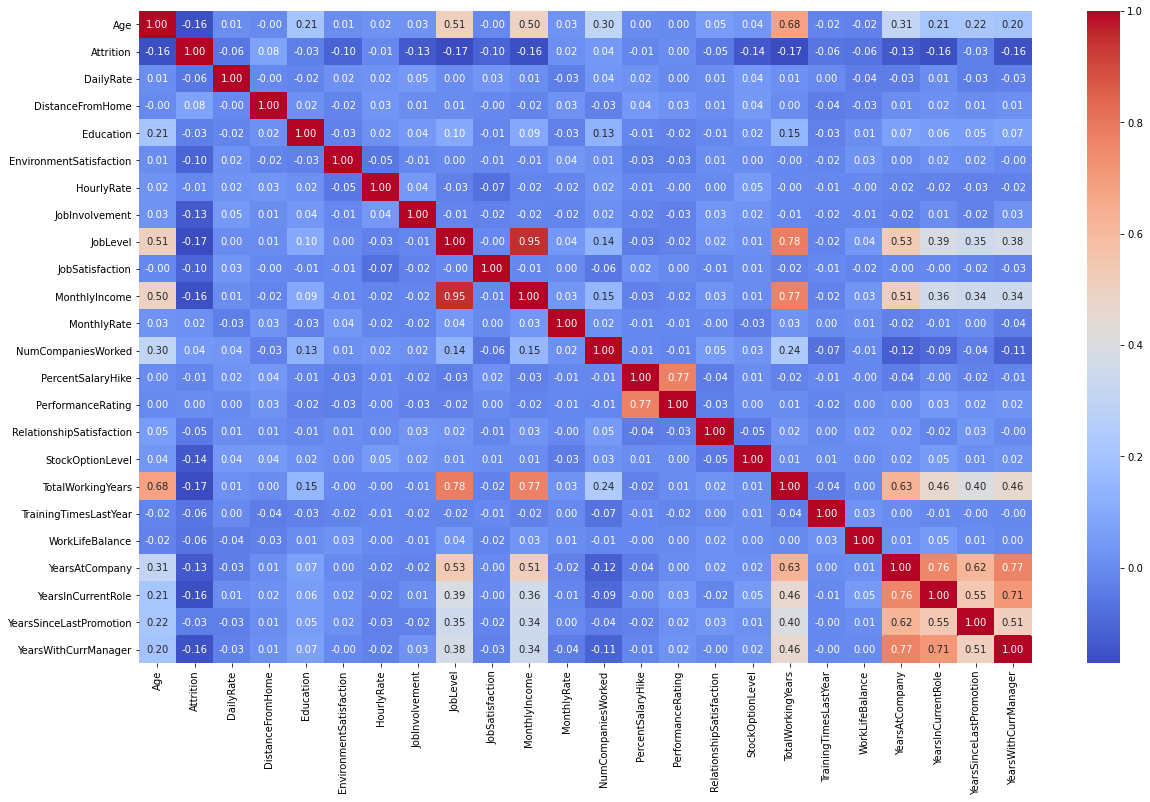

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(df_1.corr(),cmap='coolwarm',annot=True,fmt='.2f')

#### Observation:-
1. The columns Performance rating is not corelated with our target data as it is showing 0.00.

2. All the columns are not much correlated with the target column.

3. Some columns like PerformanceRating Vs PercentSalaryHike, YearsAtCompany Vs TotalWorkingYears, YearsAtCompany Vs YearsAtCurrentRole, YearsAtCompany Vs YearsSinceLastPromotion, YearsAtCompany Vs YearsWithCurrentManager show high correlation among themselves hence we can say that multicollinearity exists. 

4. Almost all columns are behaving negatively with our target variable and very less corelated.

# Categorcial Attributes

In [14]:
## segregating the object datatype.
ob=df_1.select_dtypes(include='object')

In [15]:
## Checking values counts for each categorical columns
for col in ob:
    print('\n')
    print('---------------',col,'--------------------')
    print(df_1[col].value_counts())



--------------- BusinessTravel --------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


--------------- Department --------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


--------------- EducationField --------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


--------------- Gender --------------------
Male      882
Female    588
Name: Gender, dtype: int64


--------------- JobRole --------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources  

In [16]:
#Also checking for the Target column
df_1['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

We can see that our Target attribute is imbalance.(ration 6:1)

# Data Visualization:

<AxesSubplot:title={'center':'Target data Distribution'}, xlabel='Attrition', ylabel='count'>

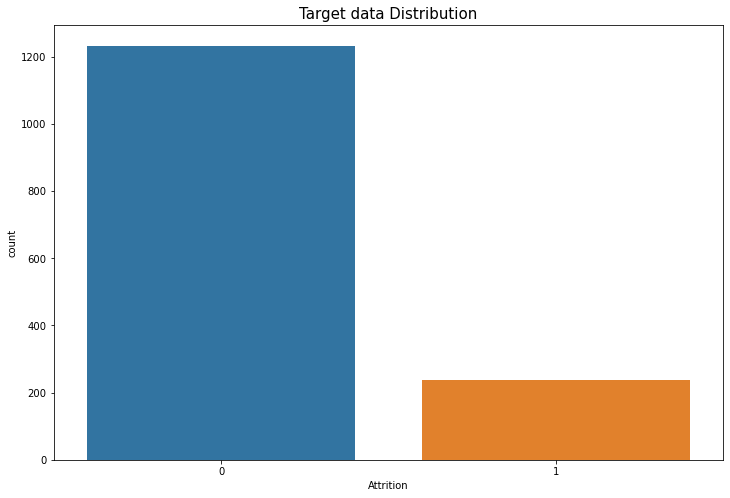

In [17]:
plt.figure(figsize=(12,8))
plt.title('Target data Distribution',fontsize=15)
sns.countplot(df_1['Attrition'],data=df_1)

We can see our data is Imbalance in nature because ratio is (6:1).

<AxesSubplot:title={'center':'Overtime vs Attrition Relation'}, xlabel='OverTime', ylabel='count'>

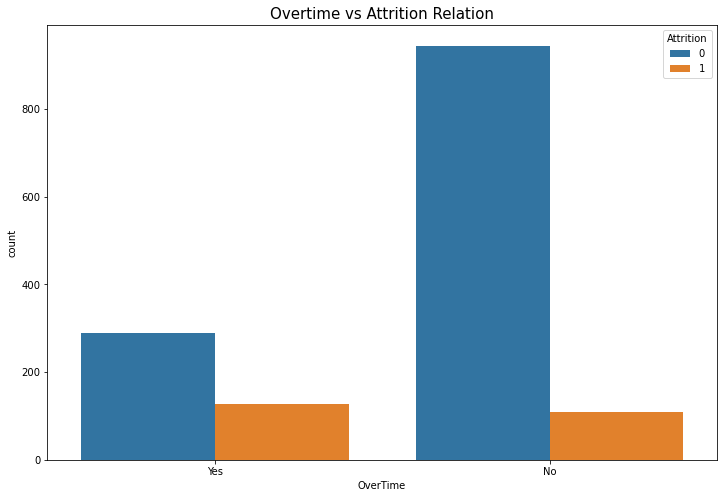

In [18]:
plt.figure(figsize=(12,8))
plt.title('Overtime vs Attrition Relation',fontsize=15)
sns.countplot(df_1['OverTime'],hue='Attrition',data=df_1)

We can see that people who do over time have higher chances to left the company as compair to person who don't do overtime.

<AxesSubplot:title={'center':'MaritalStatus vs Attrition Relation'}, xlabel='MaritalStatus', ylabel='count'>

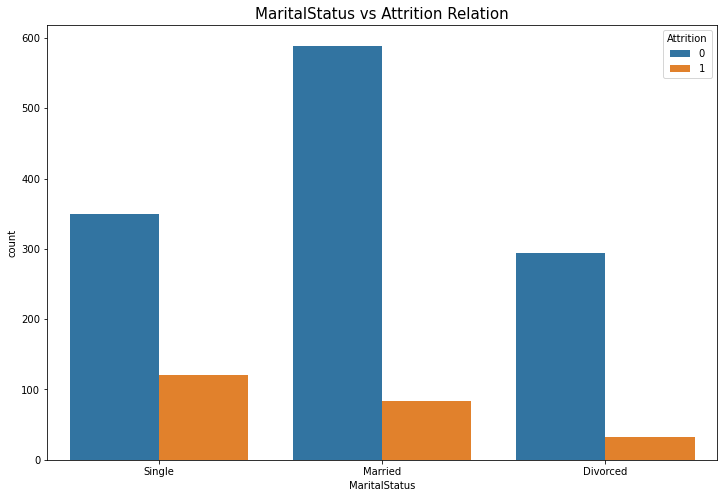

In [19]:
plt.figure(figsize=(12,8))
plt.title('MaritalStatus vs Attrition Relation',fontsize=15)
sns.countplot(df_1['MaritalStatus'],hue='Attrition',data=df_1)

We can see that, unmarried people have higher tendency to leave the company as comapired to Married.

Divorced/seperated has lowest chanaces to left the company.

<AxesSubplot:title={'center':'Job Role vs Attrition Relation'}, xlabel='JobRole', ylabel='count'>

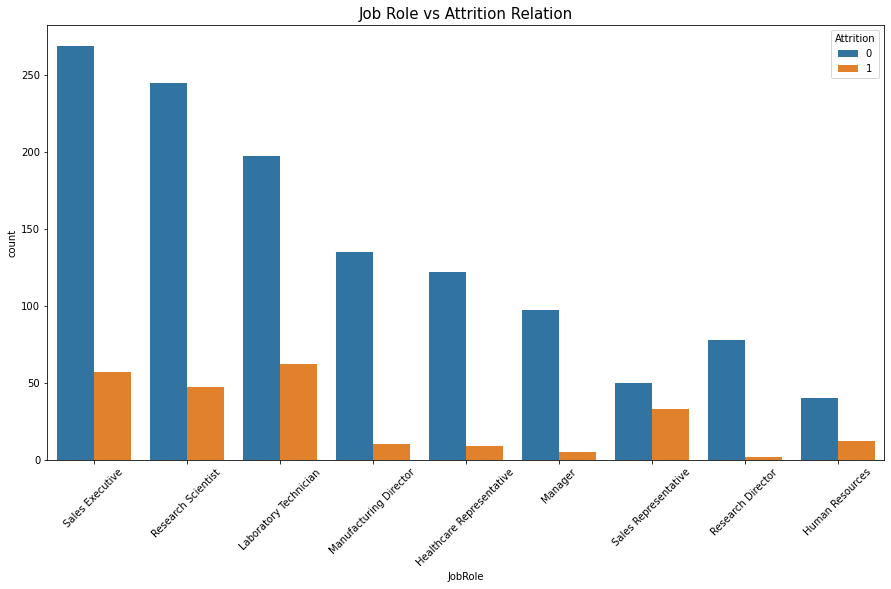

In [20]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.title('Job Role vs Attrition Relation',fontsize=15)
sns.countplot(df_1['JobRole'],hue='Attrition',data=df_1)

Laboratory Technician ,Sales Executive, Sales representatives, Research scientis have higher tendency to leave job.

<AxesSubplot:title={'center':'Sex vs Attrition Relation'}, xlabel='Gender', ylabel='count'>

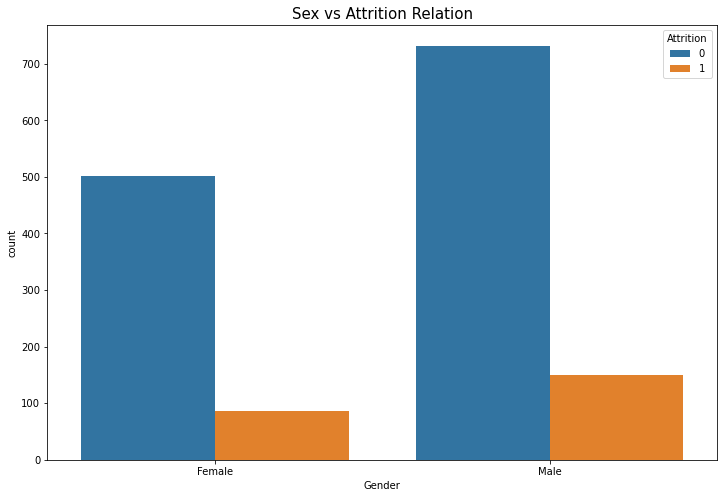

In [21]:
plt.figure(figsize=(12,8))
plt.title('Sex vs Attrition Relation',fontsize=15)
sns.countplot(df_1['Gender'],hue='Attrition',data=df_1)

<AxesSubplot:title={'center':'Sex vs Attrition'}, xlabel='Gender', ylabel='count'>

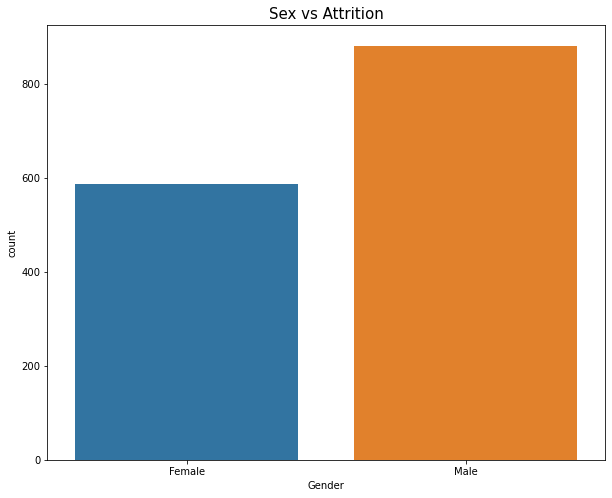

In [22]:
plt.figure(figsize=(10,8))
plt.title('Sex vs Attrition',fontsize=15)
sns.countplot(df_1['Gender'],data=df_1[df_1['Attrition']==1])

We can observe from above table that male has higher chances to change job as compaired to Female.

<AxesSubplot:title={'center':'EducationField vs Attrition Relation'}, xlabel='EducationField', ylabel='count'>

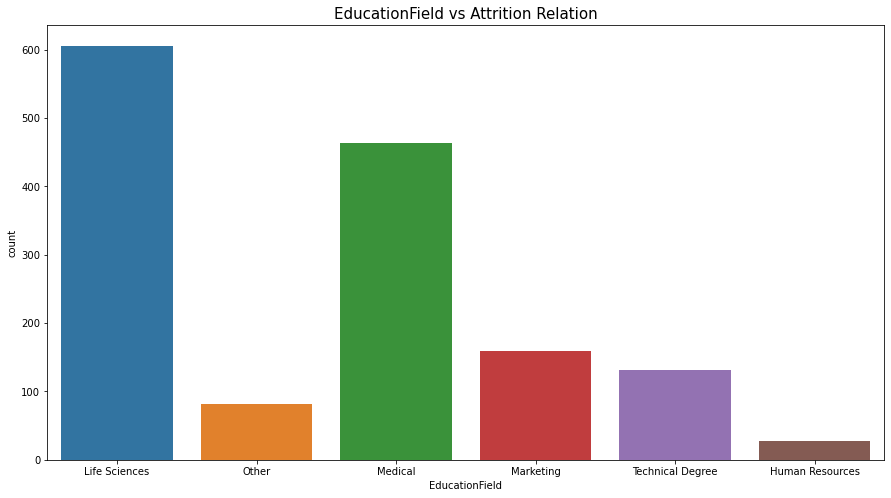

In [23]:
plt.figure(figsize=(15,8))
plt.title('EducationField vs Attrition Relation',fontsize=15)
sns.countplot(df_1['EducationField'],data=df_1[df_1['Attrition']==1])

We can see that life science and Medical two major Education fields which has higher demand in market and people are switch their job more frequent.

<AxesSubplot:title={'center':'Department vs Attrition'}, xlabel='Department', ylabel='count'>

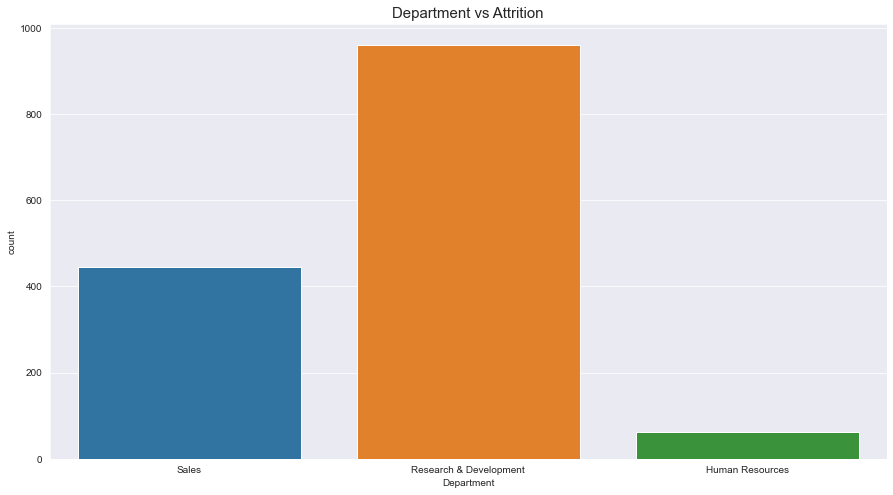

In [24]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Department vs Attrition',fontsize=15)
sns.countplot(df_1['Department'],data=df_1[df_1['Attrition']==1])

We can see that people who works in  Research & development have higher chances to leave the company.

HR department people have least chances to job change.

<AxesSubplot:title={'center':'BusinessTravel vs Attrition'}, xlabel='BusinessTravel', ylabel='count'>

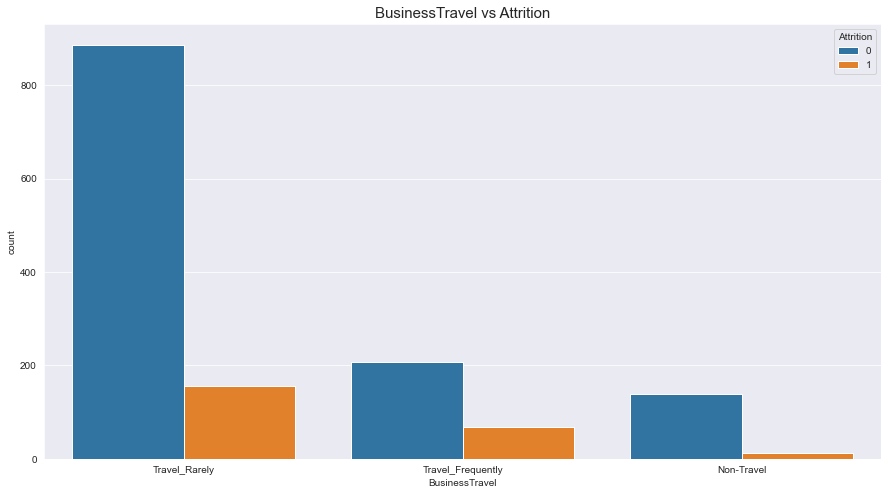

In [25]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(df_1['BusinessTravel'],hue='Attrition',data=df_1)

<AxesSubplot:title={'center':'BusinessTravel vs Attrition'}, xlabel='BusinessTravel', ylabel='count'>

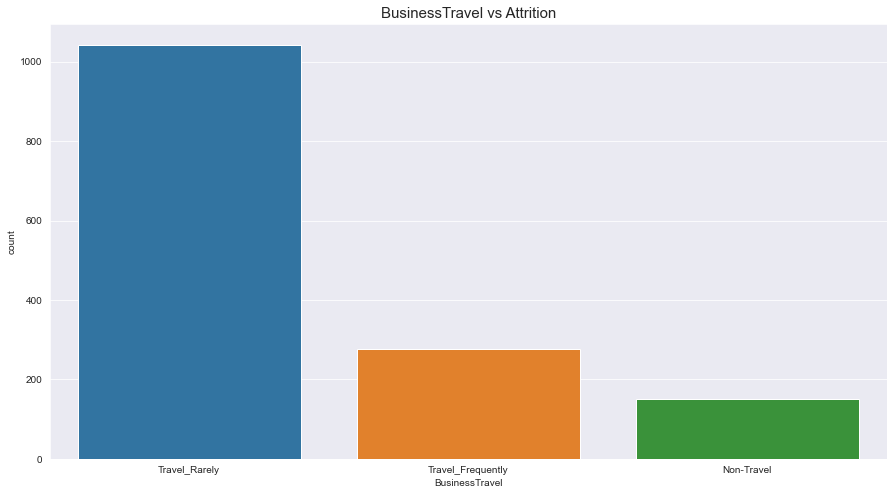

In [26]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(df_1['BusinessTravel'],data=df_1[df_1['Attrition']==1])

From above both countplot it is clear that an employee who travels rarely to other places have higher chances to left job.

<AxesSubplot:title={'center':'Age effect on Attrition'}, xlabel='Age', ylabel='count'>

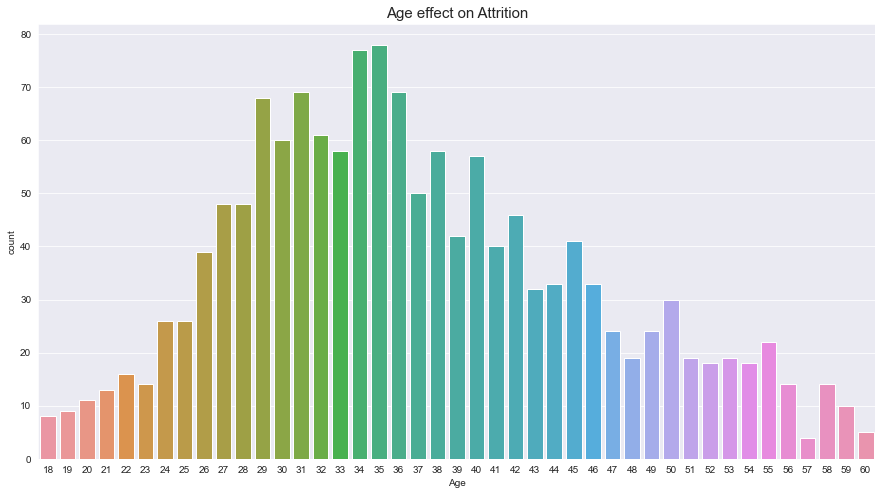

In [27]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Age effect on Attrition',fontsize=15)
sns.countplot(df_1['Age'],data=df_1[df_1['Attrition']==1])

<AxesSubplot:title={'center':'Age vs Attrition'}, xlabel='Age'>

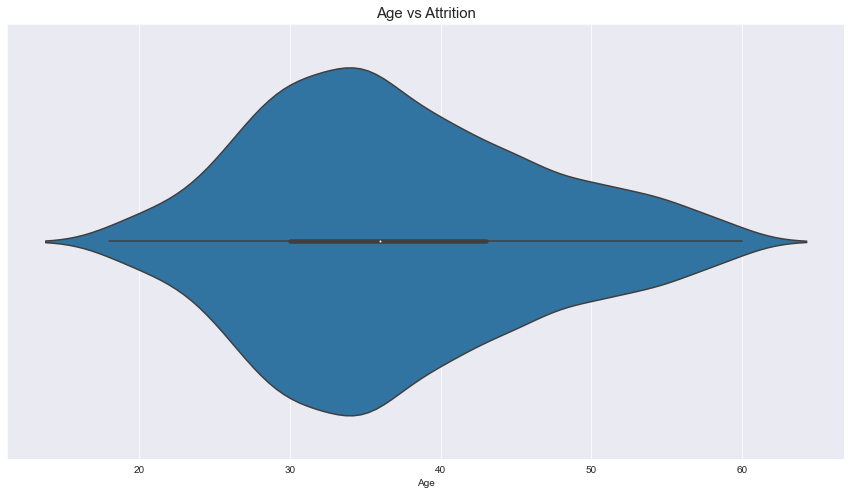

In [28]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Age vs Attrition',fontsize=15)
sns.violinplot(df_1['Age'],data=df_1[df_1['Attrition']==1])

From above two plots we can visualize that a employees whose age group is between 28-37 has highest tendency to change the job.

<AxesSubplot:title={'center':'JobSatisfaction on Attrition'}, xlabel='JobSatisfaction', ylabel='count'>

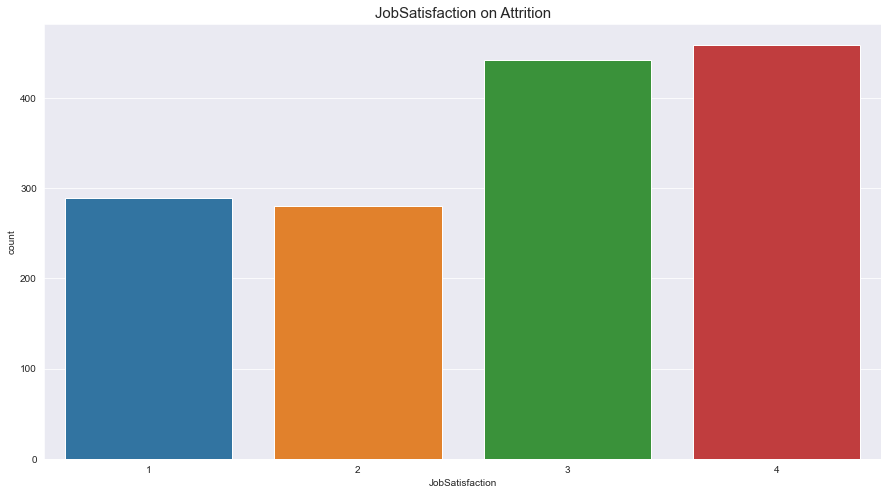

In [29]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('JobSatisfaction on Attrition',fontsize=15)
sns.countplot(df_1['JobSatisfaction'],data=df_1[df_1['Attrition']==1])

We can see that an employee with 3 or 4 job satisfaction grade has higher chance to left company.

<AxesSubplot:title={'center':'Number of years worked in company vs Attrition'}, xlabel='YearsAtCompany', ylabel='count'>

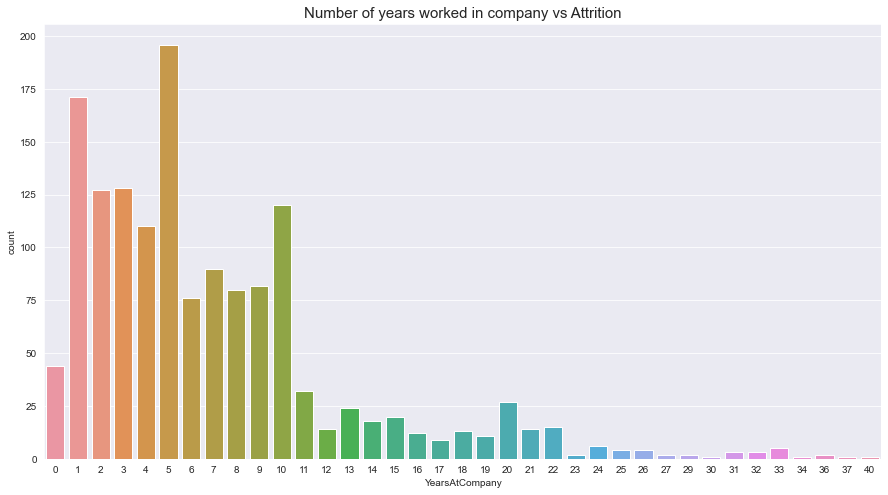

In [30]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Number of years worked in company vs Attrition',fontsize=15)
sns.countplot(df_1['YearsAtCompany'],data=df_1[df_1['Attrition']==1])

Interesting fact here we can see in our data that an employee who has worked 5 years in company, they have highest chances to left the comapany.

Additionally,employee who has worked only 1 year in company has also the sencond most tendency for job change.

<AxesSubplot:title={'center':'Last Promotion  vs Attrition'}, xlabel='YearsSinceLastPromotion', ylabel='count'>

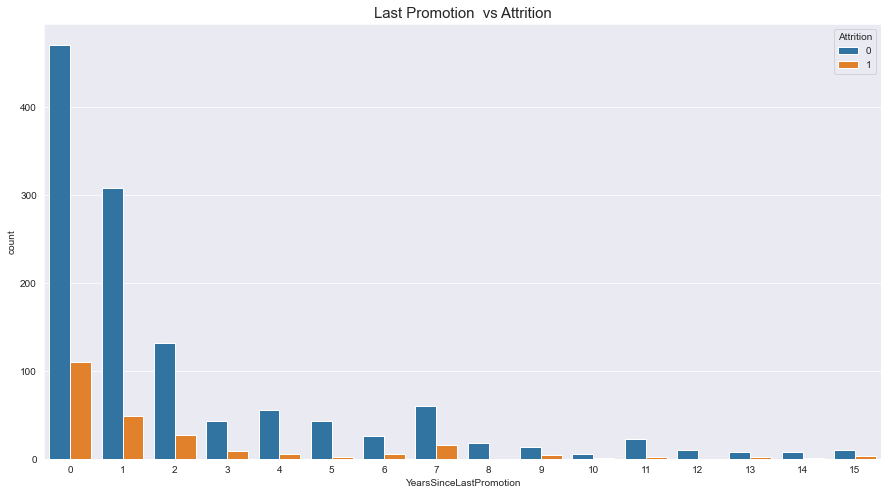

In [31]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Last Promotion  vs Attrition',fontsize=15)
sns.countplot(df_1['YearsSinceLastPromotion'],hue='Attrition',data=df_1)

We can see person who either got promoted recently or Joined recently has the highest chances of job change.

Employee who did not get promtion for 1-2 years also have a good chances for job change.

<AxesSubplot:title={'center':'Years In CurrentRole  vs Attrition'}, xlabel='YearsInCurrentRole', ylabel='count'>

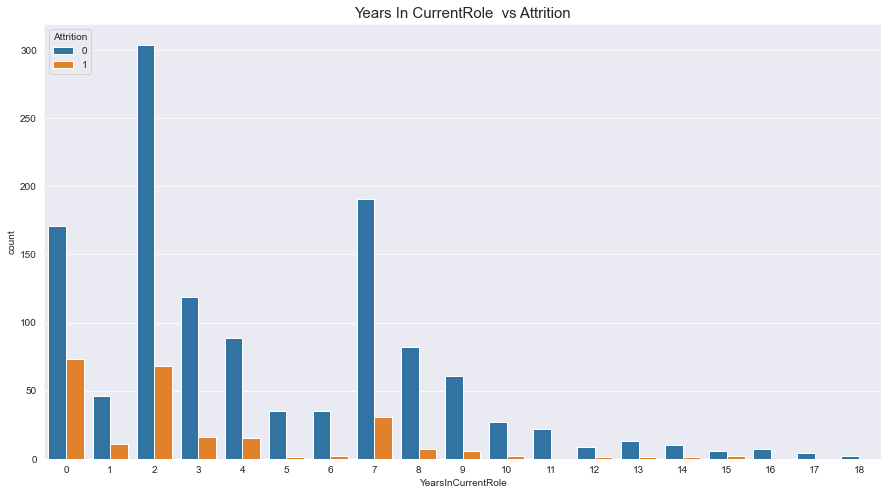

In [32]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Years In CurrentRole  vs Attrition',fontsize=15)
sns.countplot(df_1['YearsInCurrentRole'],hue='Attrition',data=df_1)

It is same as we can say that peoson who has experience of 2 years or who joined recently and woking on same profile has fair chances to left job.

<AxesSubplot:title={'center':'Work life balance vs Attrition'}, xlabel='WorkLifeBalance', ylabel='count'>

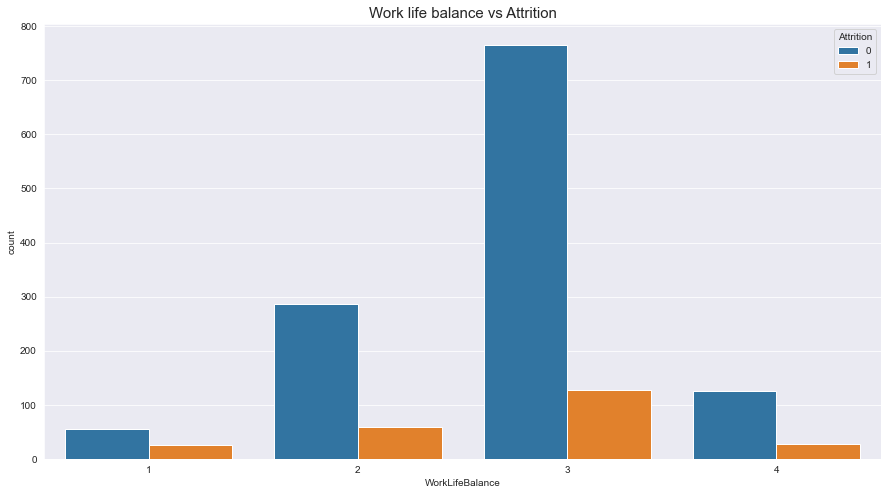

In [33]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('Work life balance vs Attrition',fontsize=15)
sns.countplot(df_1['WorkLifeBalance'],hue='Attrition',data=df_1)

We can see that an employee whose worklife balance is 3, has higher chance for job change.

<AxesSubplot:title={'center':'PercentSalaryHike  vs Attrition'}, xlabel='PercentSalaryHike', ylabel='count'>

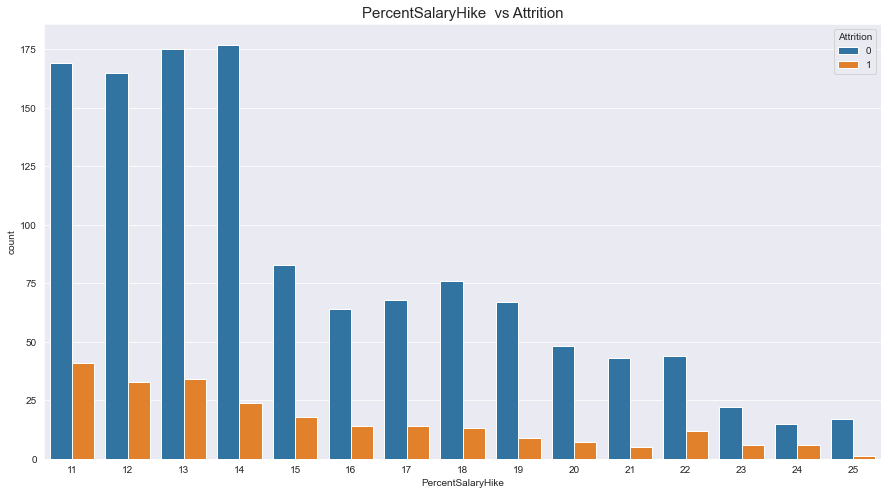

In [34]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('PercentSalaryHike  vs Attrition',fontsize=15)
sns.countplot(df_1['PercentSalaryHike'],hue='Attrition',data=df_1)

It is clearly visible that an employee who got least salary hike in year have higher tendency for job change.

<AxesSubplot:title={'center':'JobLevel vs Attrition'}, xlabel='JobLevel', ylabel='count'>

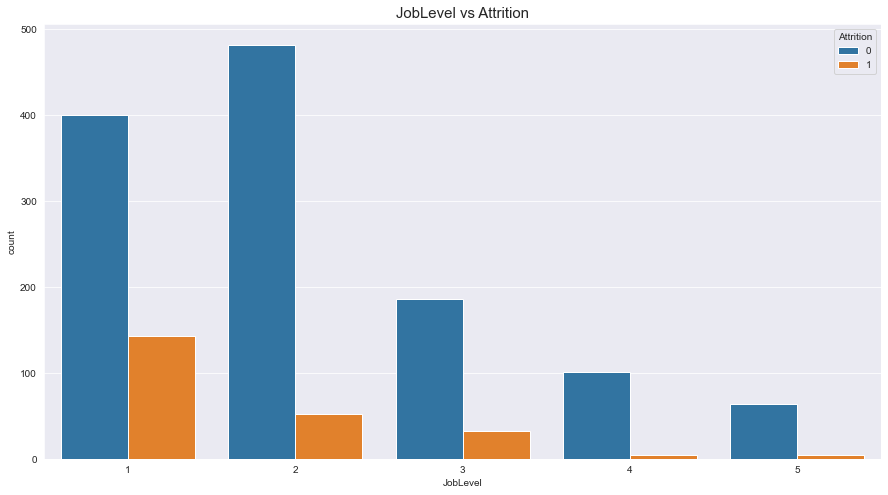

In [35]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.title('JobLevel vs Attrition',fontsize=15)
sns.countplot(df_1['JobLevel'],hue='Attrition',data=df_1)

We can see employee who has job band/level 1 has tendency to change job more frequent then job level 4 or 5.

<AxesSubplot:title={'center':'Monthly Income vs Attrition'}, xlabel='Attrition', ylabel='MonthlyIncome'>

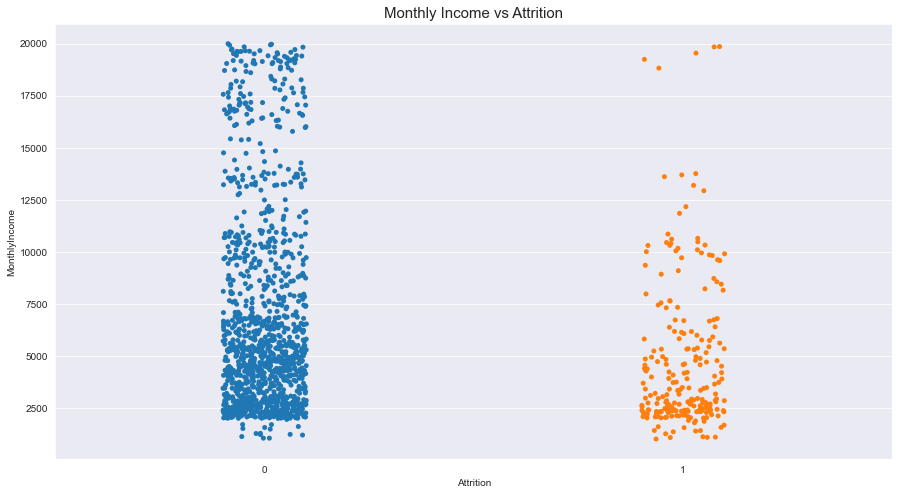

In [36]:
plt.figure(figsize=(15,8))
plt.title('Monthly Income vs Attrition',fontsize=15)
sns.stripplot(df_1['Attrition'],df_1['MonthlyIncome'],data=df_1)

We can observe that the employees whose monthly salary is below 12500 have higher chances of Job change.

<AxesSubplot:title={'center':'NumCompaniesWorked vs Attrition'}, xlabel='NumCompaniesWorked', ylabel='count'>

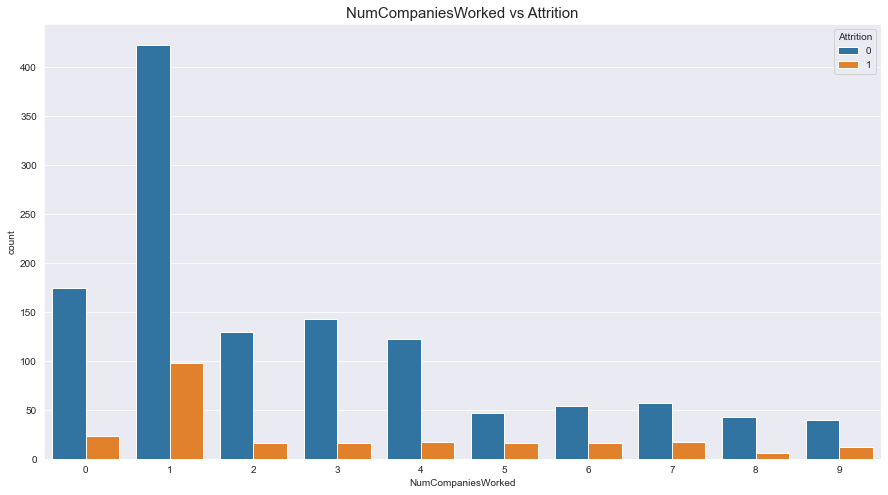

In [37]:
plt.figure(figsize=(15,8))
plt.title('NumCompaniesWorked vs Attrition',fontsize=15)
sns.countplot(df_1['NumCompaniesWorked'],hue='Attrition',data=df_1)

We can observe that an employee who has worked with 1 company previously are more looking for job change.

# Distribution:

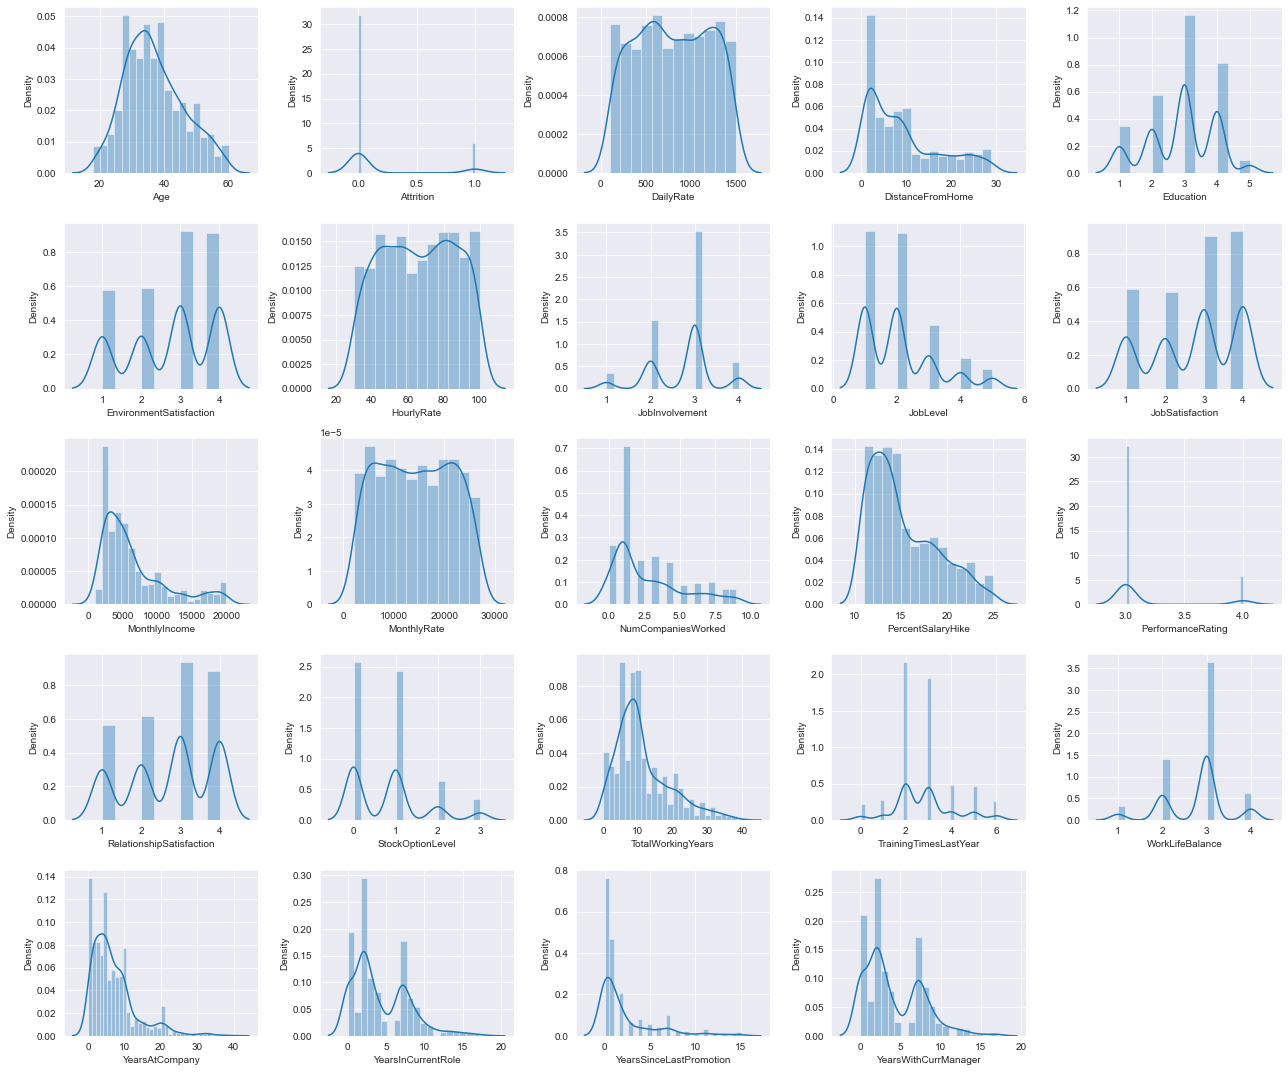

In [38]:
di=df_1.select_dtypes(exclude='object')
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.distplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

#### Observation:-

1- Most of our data is Normally distributed.

2- Attributes like Total working years,Yearsatcompany, Years since last promotion etc. are right skewed.

3-This shows some outliers must be present in our dataset.

4- We will first remove the outliers then remove the remaining skewness present in our dataset through any transformation technique. 

# Outliers Detection

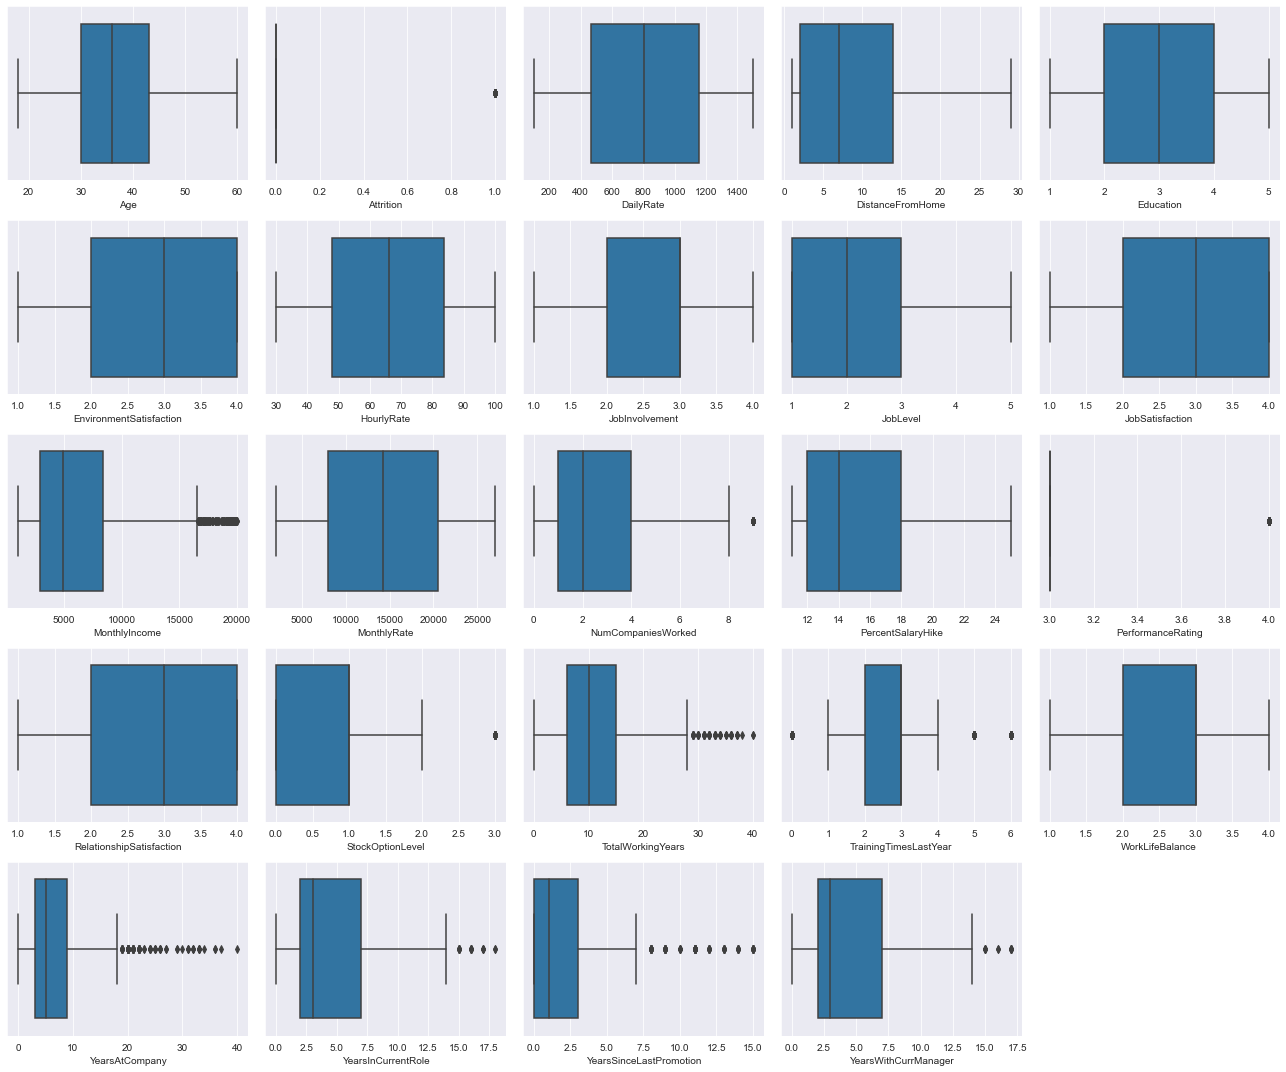

In [39]:
plt.figure(figsize=(18,15))
plot=1
for col in di:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.boxplot(df_1[col])
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

Here we can see that there are much outliers present in MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion columns which is needed to be removed by either zscore method or IQR method, whichever loses less data.

In [40]:
#Removing outliers through zscore method
df_2 = df_1[di.drop(['Attrition'], axis = 1).apply(lambda x : np.abs(x - x.mean())/x.std() <3).all(axis=1)]


In [41]:
print('Shape before and after')
print('Shape before'.ljust(20), ':', df_1.shape)
print('Shape after'.ljust(20), ':', df_2.shape)
print('Percentage Loss'.ljust(20), ':', ((df_1.shape[0] - df_2.shape[0])/df_1.shape[0])*100, '%')

Shape before and after
Shape before         : (1470, 31)
Shape after          : (1387, 31)
Percentage Loss      : 5.646258503401361 %


In [42]:
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1
df_3 = df_1[~((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
print('Shape before and after')
print('Shape before'.ljust(20), ':', df_1.shape)
print('Shape after'.ljust(20), ':', df_3.shape)
print('Percentage Loss'.ljust(20), ':', ((df_1.shape[0] - df_3.shape[0])/df_1.shape[0])*100, '%')

Shape before and after
Shape before         : (1470, 31)
Shape after          : (641, 31)
Percentage Loss      : 56.394557823129254 %


Hence by applying both method we can see that zscore method has removed very less data which is only 5.6%. Thus we will use the zscore method.

# Checking skewness

In [44]:
df_2.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [45]:
di = di.drop(['Attrition'], axis=1)

In [46]:
df_4 = df_2.copy()

In [47]:
for i in di:
    if df_4[i].skew()>.50:
        df_4[i]=np.log1p(df_4[i])

In [48]:
df_4.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobSatisfaction            -0.345612
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64

Here we can see that there are still skewness present in the columns PerformanceRating, TotalWorkingYears, YearsSinceLastPromotion and TrainingTimesLastYear, so we will use some other method.

In [49]:
df_5 = df_2.copy()

In [50]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in di:
    if df_5[i].skew() > 0.5:
        df_5[i] = pt.fit_transform(df_5[i].values.reshape(-1,1))


In [51]:
df_5.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

As we can see that we have almost removed all the skewness from our column. We will not remove the skewness of our target column as it is just a class.

# Encoding of categorical Columns

In [52]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for col in ob:
    df_5[col]= oe.fit_transform(df_5[col].values.reshape(-1,1))

In [53]:
df_5.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,-1.489968,2,1.0,2,0.0,94,3,0.349828,7.0,4,2.0,0.386674,19479,1.620671,1.0,-1.495549,0.0,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,-1.073534,0.582177
1,49,0,1.0,279,1.0,0.244561,1,1.0,3,1.0,61,2,0.349828,6.0,2,1.0,0.144235,24907,-0.561880,0.0,1.690425,0.0,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,0.193168,1.018073
2,37,1,2.0,1373,1.0,-1.028366,2,4.0,4,1.0,92,2,-1.141761,2.0,3,2.0,-1.431153,2396,1.273711,1.0,0.193797,0.0,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,-1.073534,-1.528426
3,33,0,1.0,1392,1.0,-0.698191,4,1.0,4,0.0,56,3,-1.141761,6.0,3,1.0,-0.814425,23159,-0.561880,1.0,-1.495549,0.0,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,1.027520,-1.528426
4,27,0,2.0,591,1.0,-1.028366,1,3.0,1,1.0,40,3,-1.141761,2.0,2,1.0,-0.504453,16632,1.764103,0.0,-0.957525,0.0,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,0.722874,-0.347871


# Splitting Data into Input and Output Variable

In [54]:
X = df_5.drop('Attrition', axis=1)
y = df_5['Attrition']

In [55]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,-1.489968,2,1.0,2,0.0,94,3,0.349828,7.0,4,2.0,0.386674,19479,1.620671,1.0,-1.495549,0.0,1,-1.084263,-0.173231,-2.608524,1,0.231837,0.290524,-1.073534,0.582177
1,49,1.0,279,1.0,0.244561,1,1.0,3,1.0,61,2,0.349828,6.0,2,1.0,0.144235,24907,-0.561880,0.0,1.690425,0.0,4,0.548653,0.147620,0.217074,3,0.948319,1.006575,0.193168,1.018073
2,37,2.0,1373,1.0,-1.028366,2,4.0,4,1.0,92,2,-1.141761,2.0,3,2.0,-1.431153,2396,1.273711,1.0,0.193797,0.0,2,-1.084263,-0.351153,0.217074,3,-2.156089,-1.571814,-1.073534,-1.528426
3,33,1.0,1392,1.0,-0.698191,4,1.0,4,0.0,56,3,-1.141761,6.0,3,1.0,-0.814425,23159,-0.561880,1.0,-1.495549,0.0,3,-1.084263,-0.173231,0.217074,3,0.621429,1.006575,1.027520,-1.528426
4,27,2.0,591,1.0,-1.028366,1,3.0,1,1.0,40,3,-1.141761,2.0,2,1.0,-0.504453,16632,1.764103,0.0,-0.957525,0.0,4,0.548653,-0.544046,0.217074,3,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,1.408969,2,3.0,3,1.0,41,4,0.349828,2.0,4,1.0,-1.039557,12290,0.798319,0.0,0.716255,0.0,3,0.548653,1.039364,0.217074,3,0.003289,-0.390769,-1.073534,0.018680
1466,39,2.0,613,1.0,-0.049519,1,3.0,4,1.0,42,2,1.133237,0.0,1,1.0,1.127335,21457,0.798319,0.0,0.193797,0.0,1,0.548653,-0.007630,1.606919,3,0.436162,1.006575,0.193168,1.018073
1467,27,2.0,155,1.0,-0.440553,3,1.0,2,1.0,87,4,0.349828,4.0,2,1.0,0.424210,5174,-0.561880,1.0,1.285201,0.0,2,0.548653,-0.544046,-2.608524,3,0.231837,-0.390769,-1.073534,0.018680
1468,49,1.0,1023,2.0,-1.028366,3,3.0,4,1.0,63,2,0.349828,7.0,2,1.0,0.222228,13243,0.052119,0.0,-0.129959,0.0,4,-1.084263,1.039364,0.217074,2,0.791264,0.793764,-1.073534,1.205782


In [56]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int64

# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(X)
X =pd.DataFrame(x_scaled,columns=X.columns)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.489968,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,0.376231,0.349828,1.007448,1.143776,1.231027,0.386674,0.734688,1.620671,1.584737,-1.495549,0.0,-1.575817,-1.084263,-0.173231,-2.608524,-2.501172,0.231837,0.290524,-1.073534,0.582177
1,1.442111,-0.905354,-1.307769,-0.496337,0.244561,-1.853858,-0.940815,0.251978,0.813067,-0.239091,-1.034126,0.349828,0.604178,-0.673426,-0.141509,0.144235,1.505353,-0.561880,-0.631019,1.690425,0.0,1.199034,0.548653,0.147620,0.217074,0.336558,0.948319,1.006575,0.193168,1.018073
2,0.083966,0.593126,1.406752,-0.496337,-1.028366,-0.876177,1.305159,1.169285,0.813067,1.290017,-1.034126,-1.141761,-1.008901,0.235175,1.231027,-1.431153,-1.690747,1.273711,1.584737,0.193797,0.0,-0.650866,-1.084263,-0.351153,0.217074,0.336558,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.368749,-0.905354,1.453896,-0.496337,-0.698191,1.079185,-0.940815,1.169285,-1.229911,-0.485721,0.376231,-1.141761,0.604178,0.235175,-0.141509,-0.814425,1.257173,-0.561880,1.584737,-1.495549,0.0,0.274084,-1.084263,-0.173231,0.217074,0.336558,0.621429,1.006575,1.027520,-1.528426
4,-1.047821,0.593126,-0.533609,-0.496337,-1.028366,-1.853858,0.556501,-1.582635,0.813067,-1.274939,0.376231,-1.141761,-1.008901,-0.673426,-0.141509,-0.504453,0.330473,1.764103,-0.631019,-0.957525,0.0,1.199034,0.548653,-0.544046,0.217074,0.336558,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.408969,-0.876177,0.556501,0.251978,0.813067,-1.225613,1.786588,0.349828,-1.008901,1.143776,-0.141509,-1.039557,-0.286002,0.798319,-0.631019,0.716255,0.0,0.274084,0.548653,1.039364,0.217074,0.336558,0.003289,-0.390769,-1.073534,0.018680
1383,0.310324,0.593126,-0.479021,-0.496337,-0.049519,-1.853858,0.556501,1.169285,0.813067,-1.176286,-1.034126,1.133237,-1.815441,-1.582027,-0.141509,1.127335,1.015523,0.798319,-0.631019,0.193797,0.0,-1.575817,0.548653,-0.007630,1.606919,0.336558,0.436162,1.006575,0.193168,1.018073
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.440553,0.101504,-0.940815,-0.665328,0.813067,1.043387,1.786588,0.349828,-0.202362,-0.673426,-0.141509,0.424210,-1.296328,-0.561880,1.584737,1.285201,0.0,-0.650866,0.548653,-0.544046,-2.608524,0.336558,0.231837,-0.390769,-1.073534,0.018680
1385,1.442111,-0.905354,0.538304,1.405373,-1.028366,0.101504,0.556501,1.169285,0.813067,-0.140439,-1.034126,0.349828,1.007448,-0.673426,-0.141509,0.222228,-0.150696,0.052119,-0.631019,-0.129959,0.0,1.199034,-1.084263,1.039364,0.217074,-1.082307,0.791264,0.793764,-1.073534,1.205782


# Feature Importance

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(X,y)

ExtraTreesClassifier()

In [59]:
print(extra.feature_importances_)

[0.04145464 0.02537624 0.02990306 0.02552232 0.03502678 0.02905651
 0.03089672 0.04045074 0.02110614 0.03223457 0.03436677 0.03690759
 0.03318135 0.03650502 0.0306381  0.04362039 0.03173292 0.03179473
 0.07335777 0.03057671 0.         0.03160442 0.03796095 0.04000293
 0.02953292 0.03502238 0.03450577 0.03223563 0.02723286 0.03819306]


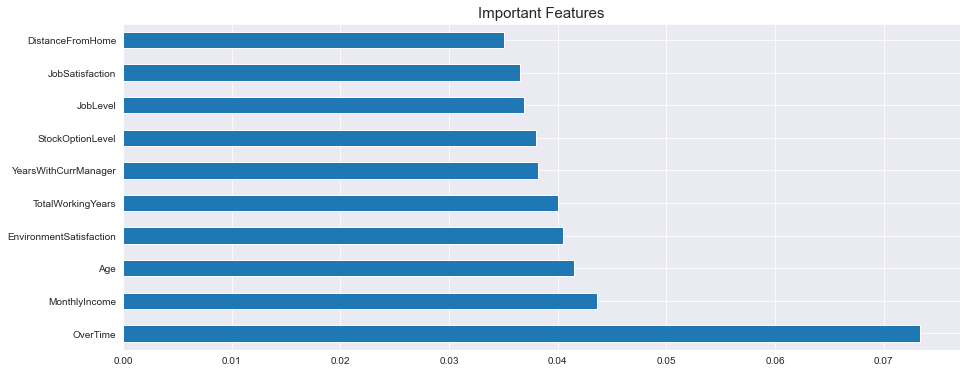

In [60]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

We can see that over time , age and Monthly Income are 3 major attributed which decide whether employee will leave or Not.

# PCA

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
Z = pca.fit(X)

In [62]:
Z.explained_variance_ratio_

array([1.46997413e-01, 7.41984711e-02, 6.23896197e-02, 5.72235307e-02,
       4.00068325e-02, 3.96704802e-02, 3.91614891e-02, 3.76053590e-02,
       3.73394617e-02, 3.64078141e-02, 3.52716802e-02, 3.48762712e-02,
       3.35437721e-02, 3.32372295e-02, 3.27326189e-02, 3.16511253e-02,
       3.08794511e-02, 3.04167289e-02, 2.94897782e-02, 2.88781779e-02,
       2.63948971e-02, 2.11015894e-02, 1.91771836e-02, 9.90070469e-03,
       9.17291212e-03, 8.54764870e-03, 6.70752666e-03, 3.79196014e-03,
       3.22827342e-03, 7.21222196e-34])

In [63]:
var_cumu = np.cumsum(Z.explained_variance_ratio_)*100
var_cumu

array([ 14.6997413 ,  22.11958841,  28.35855038,  34.08090345,
        38.0815867 ,  42.04863472,  45.96478363,  49.72531953,
        53.4592657 ,  57.10004711,  60.62721513,  64.11484225,
        67.46921946,  70.79294241,  74.06620429,  77.23131682,
        80.31926193,  83.36093481,  86.30991263,  89.19773042,
        91.83722013,  93.94737907,  95.86509743,  96.8551679 ,
        97.77245911,  98.62722398,  99.29797664,  99.67717266,
       100.        , 100.        ])

In [64]:
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% Variance: ", k)

Number of components explaining 95% Variance:  22


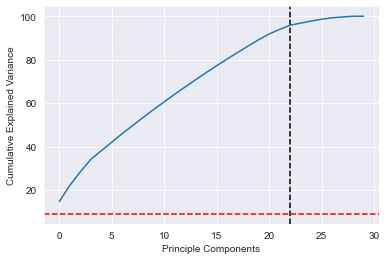

In [65]:
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principle Components')
plt.axvline(x=k, color = 'k', linestyle = '--')
plt.axhline(y=9, color = 'r', linestyle = '--' )
plt.plot(var_cumu)

Based on the plot above it's clear we should pick 22 features at 95% variance.

In [66]:
pca=PCA(n_components=22)
X = pca.fit_transform(X)
X.shape

(1387, 22)

# Model Building

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [68]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        y_pred_prob = clf.predict_proba(x_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    print('\n')
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label= clf)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(clf)
    return final_r

max accuracy score corresponding to 60 is 0.8201438848920863


cross validation score 0.8673376100563592


Standard Deviation 0.0070327002662116415


F1 score 0.515625


Training accuracy 0.7867170626349892


Test Accuracy 0.7769784172661871


Confusion Matrix [[183  49]
 [ 13  33]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.79      0.86       232
           1       0.40      0.72      0.52        46

    accuracy                           0.78       278
   macro avg       0.67      0.75      0.69       278
weighted avg       0.85      0.78      0.80       278



Roc_auc Score 0.7530922038980509




60

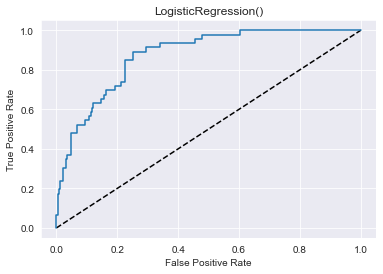

In [69]:
## Logistic Regression
LG = LogisticRegression()
max_accuracy_score(LG,X,y)

max accuracy score corresponding to 43 is 0.8057553956834532


cross validation score 0.7880191153936057


Standard Deviation 0.015783406894406316


F1 score 0.3760683760683761


Training accuracy 1.0


Test Accuracy 0.737410071942446


Confusion Matrix [[183  49]
 [ 24  22]]


Classification Report               precision    recall  f1-score   support

           0       0.88      0.79      0.83       232
           1       0.31      0.48      0.38        46

    accuracy                           0.74       278
   macro avg       0.60      0.63      0.60       278
weighted avg       0.79      0.74      0.76       278



Roc_auc Score 0.6335269865067465




43

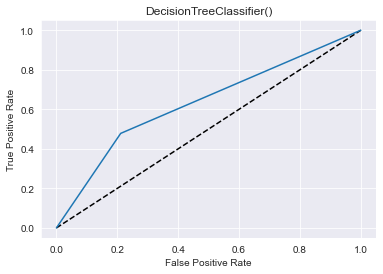

In [70]:
## Decision Tree
DT =DecisionTreeClassifier()
max_accuracy_score(DT,X,y)

max accuracy score corresponding to 79 is 0.7122302158273381


cross validation score 0.847874191621432


Standard Deviation 0.006965222272515682


F1 score 0.425


Training accuracy 0.8563714902807775


Test Accuracy 0.6690647482014388


Confusion Matrix [[152  80]
 [ 12  34]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.66      0.77       232
           1       0.30      0.74      0.42        46

    accuracy                           0.67       278
   macro avg       0.61      0.70      0.60       278
weighted avg       0.82      0.67      0.71       278



Roc_auc Score 0.697151424287856




79

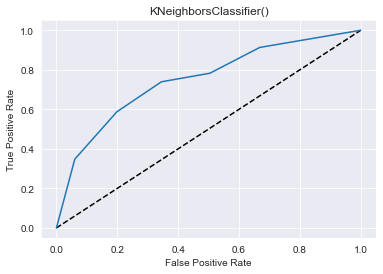

In [71]:
## KNN
KNN =KNeighborsClassifier()
max_accuracy_score(KNN,X,y)

max accuracy score corresponding to 81 is 0.8165467625899281


cross validation score 0.8630158688933329


Standard Deviation 0.007173576080389747


F1 score 0.5354330708661418


Training accuracy 0.8137149028077754


Test Accuracy 0.7877697841726619


Confusion Matrix [[185  47]
 [ 12  34]]


Classification Report               precision    recall  f1-score   support

           0       0.94      0.80      0.86       232
           1       0.42      0.74      0.54        46

    accuracy                           0.79       278
   macro avg       0.68      0.77      0.70       278
weighted avg       0.85      0.79      0.81       278



Roc_auc Score 0.7682721139430285




81

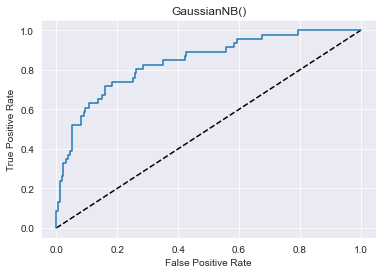

In [72]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,X,y)

max accuracy score corresponding to 81 is 0.8776978417266187


cross validation score 0.854364594966626


Standard Deviation 0.005182689445089292


F1 score 0.3529411764705882


Training accuracy 1.0


Test Accuracy 0.841726618705036


Confusion Matrix [[222  10]
 [ 34  12]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.96      0.91       232
           1       0.55      0.26      0.35        46

    accuracy                           0.84       278
   macro avg       0.71      0.61      0.63       278
weighted avg       0.81      0.84      0.82       278



Roc_auc Score 0.6088830584707646




81

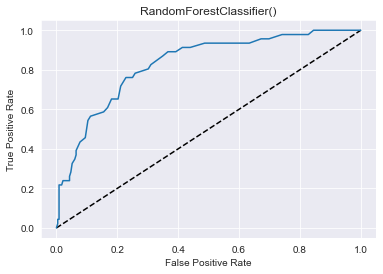

In [73]:
#Random forest
RF = RandomForestClassifier()
max_accuracy_score(RF,X,y)

max accuracy score corresponding to 91 is 0.8129496402877698


cross validation score 0.8507544866633768


Standard Deviation 0.0029977856545921563


F1 score 0.5


Training accuracy 0.8520518358531317


Test Accuracy 0.7985611510791367


Confusion Matrix [[194  38]
 [ 18  28]]


Classification Report               precision    recall  f1-score   support

           0       0.92      0.84      0.87       232
           1       0.42      0.61      0.50        46

    accuracy                           0.80       278
   macro avg       0.67      0.72      0.69       278
weighted avg       0.83      0.80      0.81       278



Roc_auc Score 0.7224512743628186




91

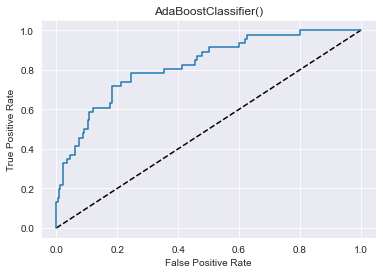

In [74]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,X,y)

max accuracy score corresponding to 68 is 0.8345323741007195


cross validation score 0.865901358335714


Standard Deviation 0.012948939660253737


F1 score 0.5


Training accuracy 0.9600431965442765


Test Accuracy 0.8201438848920863


Confusion Matrix [[203  29]
 [ 21  25]]


Classification Report               precision    recall  f1-score   support

           0       0.91      0.88      0.89       232
           1       0.46      0.54      0.50        46

    accuracy                           0.82       278
   macro avg       0.68      0.71      0.70       278
weighted avg       0.83      0.82      0.83       278



Roc_auc Score 0.7092391304347826




68

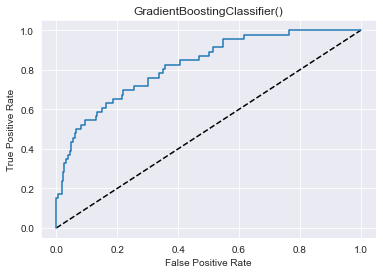

In [75]:
## Gardient Boost
GB = GradientBoostingClassifier()
max_accuracy_score(GB,X,y)

max accuracy score corresponding to 74 is 0.8669064748201439


cross validation score 0.8622834584318104


Standard Deviation 0.011148301552878053


F1 score 0.5287356321839081


Training accuracy 1.0


Test Accuracy 0.8525179856115108


Confusion Matrix [[214  18]
 [ 23  23]]


Classification Report               precision    recall  f1-score   support

           0       0.90      0.92      0.91       232
           1       0.56      0.50      0.53        46

    accuracy                           0.85       278
   macro avg       0.73      0.71      0.72       278
weighted avg       0.85      0.85      0.85       278



Roc_auc Score 0.7112068965517241




74

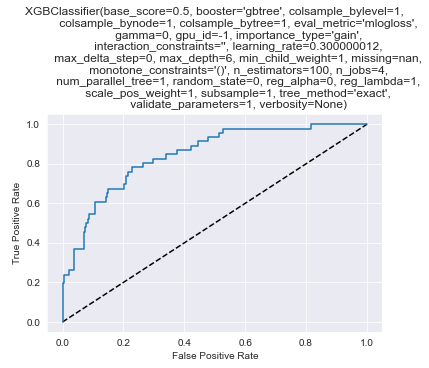

In [76]:
# XGBoost Classifier
XGB = XGBClassifier(eval_metric = 'mlogloss')
max_accuracy_score(XGB, X,y)

In [80]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','KNNClassifier','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier', 'XGBoostClassifier'],
                         'Accuracy Score':[82.01, 80.57, 71.22, 81.65, 87.76, 81.29, 83.45, 86.69],
                         'Cross_validation':[86.73, 78.80, 84.78, 86.30, 85.43, 85.07, 86.59, 86.22],
                         'F1_Score':[51.56, 37.60, 42.50, 53.54, 35.29, 0.50, 0.50, 52.87],
                         'Roc_Auc score':[75.30, 63.35, 69.71, 76.82, 60.88, 72.24, 72.92, 71.12]})
best_model  

,Model,Accuracy Score,Cross_validation,F1_Score,Roc_Auc score
0,LogisticRegression,82.01,86.73,51.56,75.30
1,DecisionTreeClassifier,80.57,78.80,37.60,63.35
2,KNNClassifier,71.22,84.78,42.50,69.71
3,GaussianNB,81.65,86.30,53.54,76.82
4,RandomForestClassifier,87.76,85.43,35.29,60.88
5,AdaBoostClassifier,81.29,85.07,0.50,72.24
6,GradientBoostingClassifier,83.45,86.59,0.50,72.92
7,XGBoostClassifier,86.69,86.22,52.87,71.12


Hence from all the models the XGBoost Classifier has least difference between the acuracy score and crossvalidation score. Also the F1_score and Roc_Auc score is better than most of the model. Hence we will choose the XGBoost classifier as our best model.

# Hyper Parameter Tuning

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=74)
## Upsampling
X_train_s,y_train_s=SMOTE().fit_resample(X_train,y_train)
XGB = XGBClassifier()
param = {'learning_rate': [0.05, 0.10, 0.15],
         'max_depth': [3, 4, 5, 6, 8],
         'min_child_weight': [1, 3, 5, 7],
         'gamma': [0.0, 0.1, 0.2],
         'colsample_bytree': [0.3, 0.4]}
grid = GridSearchCV(estimator= XGB, param_grid = param, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_s,y_train_s)
grid.best_params_

[21:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1}

Final Accuracy_score : 0.8273381294964028


Final f_1 score : 0.4545454545454546


Final roc_auc score : 0.7178130511463845


Final classification Report :               precision    recall  f1-score   support

           0       0.93      0.86      0.90       243
           1       0.38      0.57      0.45        35

    accuracy                           0.83       278
   macro avg       0.66      0.72      0.68       278
weighted avg       0.86      0.83      0.84       278



Final confusion Matrix : [[210  33]
 [ 15  20]]




Text(0.5, 1.0, 'XGBoost Classifier')

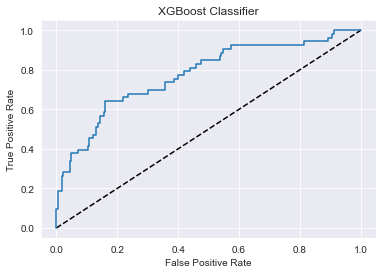

In [81]:
XGB_final = XGBClassifier(eval_metric = 'mlogloss',
                          colsample_bytree = 0.3,
                          gamma = 0.2,
                          learning_rate = 0.1,
                          max_depth = 8,
                          min_child_weight = 1)
XGB_final.fit(X_train_s,y_train_s)
pred=XGB_final.predict(X_test)
y_pred_prob = XGB_final.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))
print('\n')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')

Final Accuracy_score : 0.8093525179856115


Final f_1 score : 0.4854368932038835


Final roc_auc score : 0.6885964912280702


Final classification Report :               precision    recall  f1-score   support

           0       0.89      0.88      0.88       228
           1       0.47      0.50      0.49        50

    accuracy                           0.81       278
   macro avg       0.68      0.69      0.68       278
weighted avg       0.81      0.81      0.81       278



Final confusion Matrix : [[200  28]
 [ 25  25]]




Text(0.5, 1.0, 'XGBoost Classifier')

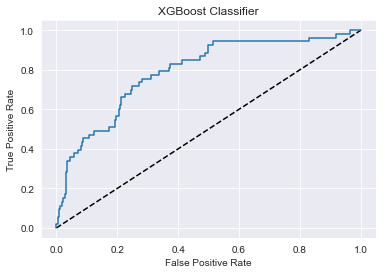

In [84]:
XGB = XGBClassifier(eval_metric = 'mlogloss')
XGB.fit(X_train_s,y_train_s)
pred=XGB.predict(X_test)
y_pred_prob = XGB.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))
print('\n')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')

Here we can see that the Hyperparameters give better score than the default parameters. Hence we will final save the tuned model.

# Saving Model

In [85]:
import joblib
joblib.dump(XGB_final, 'HR_Attrition_XGB.pkl')

['HR_Attrition_XGB.pkl']

# Loading the model

In [86]:
model = joblib.load('HR_Attrition_XGB.pkl')
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)